# Classifying iris species flowers using KNN estimator

#### Here we find the best way to find the value of 'k' for classifying an out-of-sample data into one of the three iris species

In [23]:
#1.importing the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# importing the function load_iris which will return the iris dataset
from sklearn.datasets import load_digits

# for splitting the dataset into test and train
from sklearn.model_selection import train_test_split

# importing the metrics for measuring accuracy between predicted and true responses
from sklearn import metrics

In [24]:
#iris holds the object of datatype 'bunch' which has the dataset and other attributes
i = load_digits()

In [25]:
#shows the dataset, only the features 
print (i.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
#name of the features present in iris dataset
print (i.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#the response for each observation in the dataset in numerical form
print (i.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#shows the name of the values present in the finite set for classification 
print (i.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
# separating the features and response into separate objects
# 'X' is a feature matrix 
X = i.data
# 'y' is a response vector
y = i.target

In [8]:
# All of the above objects are of type numpy.ndarray
type (X)

numpy.ndarray


    A two-dimensional array with the inputs (x)
    A one-dimensional array with the outputs (y)

options are the optional keyword arguments that you can use to get desired behavior:

    train_size is the number that defines the size of the training set. If you provide a float, then it must be between 0.0 and 1.0 and will define the share of the dataset used for testing. If you provide an int, then it will represent the total number of the training samples. The default value is None.

    test_size is the number that defines the size of the test set. It’s very similar to train_size. You should provide either train_size or test_size. If neither is given, then the default share of the dataset that will be used for testing is 0.25, or 25 percent.

    random_state is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. The default value is None.

    shuffle is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.

    stratify is an array-like object that, if not None, determines how to use a stratified split.


In [9]:
#about to perform train/test split and find testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 2)
print (X_train.shape)
print (X_test.shape)

(135, 4)
(15, 4)


In [10]:
X_test

array([[4.6, 3.4, 1.4, 0.3],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.8, 3. , 1.4, 0.1],
       [4.8, 3.4, 1.9, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [5. , 3. , 1.6, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [4.8, 3. , 1.4, 0.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6. , 3.4, 4.5, 1.6]])

In [11]:
# 2. Instantiating the 'estimator'
knn = KNeighborsClassifier(n_neighbors = 1)

# 3. fit the model with data, aka 'model training'
knn.fit(X_train, y_train)

# 4. Predict the response for observations being passed, here 'X-test'
y_pred = knn.predict(X_test)

y_pred

# getting the testing accuracy of KNN (K=5)


array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1])

In [12]:
print ("KNN:",metrics.accuracy_score(y_test, y_pred)*100)

KNN: 100.0


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X, y)

y_pred = dt.predict(X_test)

y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1])

In [14]:
print ("Decision Tree:",metrics.accuracy_score(y_test, y_pred)*100)

Decision Tree: 100.0


 ### Using different values for 'K' in KNN
 
 for the case k = 5 we got , accuracy = 96.67%, trying k values from 1 to 25, we get ...
 

In [15]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


Text(0, 0.5, 'Accuracy')

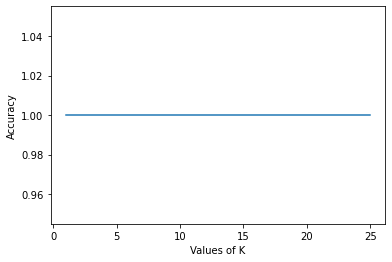

In [16]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')


This shows that **train/test split** punishes models which have are too complex or not complex enough, so the best value for 'k' is around **11**

In [17]:
# 2. Instantiating the 'estimator'
knn = KNeighborsClassifier(n_neighbors = 1)
# 3. fit the model with data, aka 'model training'
knn.fit(X, y)
# 4. Predict the out-of-sample data
a=[[9.0, 3.4, 1.0, 2.0]]
knn.predict(a)

array([0])

In [18]:
print (metrics.accuracy_score(y_test, y_pred)*100)

100.0


In [19]:
dt=DecisionTreeClassifier()

dt.fit(X,y)

dt.predict([[2.7,1.2,1.2,3.5]])

array([0])

In [20]:
print (metrics.accuracy_score(y_test, y_pred)*100)

100.0


In [21]:
import pandas as pd

In [22]:
df=pd.read_csv("tennis.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'tennis.csv'

In [ ]:
X = df[['outlook','temp','humidity','wind']]
y=df['play']
X

In [ ]:
knn.fit(X,y)

y_pred=knn.predict([['Sunny','Cool','High','Weak']])

y_pred
